In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
X, y = load('../../preprocessing/clustering_data.joblib')

In [3]:
X.head()

,Belts,PersonalInjury,PropertyDamage,CommercialLicense,CommercialVehicle,ContributedToAccident,Gender,VehicleType_'02 - Automobile',VehicleType_'03 - Station Wagon',VehicleType_'04 - Limousine',...,Model_VAN,Model_VERSA,Model_VN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,ArrestType_Marked Patrol,ArrestType_Unmarked Patrol
0,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,1.428003,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,-0.679667,-0.521663,-0.236043,1.345395,0.431566,-0.225375
1,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,-0.679667,-0.521663,4.236511,-0.743276,0.431566,-0.225375
2,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,1.471309,-0.521663,-0.236043,-0.743276,-2.317144,4.437056
3,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,1.471309,-0.521663,-0.236043,-0.743276,0.431566,-0.225375
4,-0.188036,-0.107601,-0.14066,5.750436,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,-0.679667,-0.521663,-0.236043,1.345395,0.431566,-0.225375


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [5]:
X_pca

array([[-1.17155207,  2.14366753],
       [-0.37967295, -1.32300837],
       [-1.00928931,  2.29875555],
       ...,
       [ 0.49535109,  0.82896453],
       [-0.01885334,  1.96199782],
       [ 0.31539644,  1.00073375]])

In [6]:
pca.explained_variance_ratio_[0:2].sum()

0.03026559191314832

In [7]:
def visualize_clustering(centers, labels, features, alg_name):
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")
    plt.scatter(features[0], features[1], c = labels)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title('{} {} klastera'.format(alg_name, len(centers)))
    plt.show()

# Bisecting K Means

Bisecting K-means algoritam se zasniva na ideji: Prvo podeliti instance u 2 klastera, zatim izabrati jedan od postojećih i podeliti ga na 2 klastera. 
    
Proces se ponavlja dok se ne formira k klastera.

In [8]:
from sklearn. cluster import BisectingKMeans

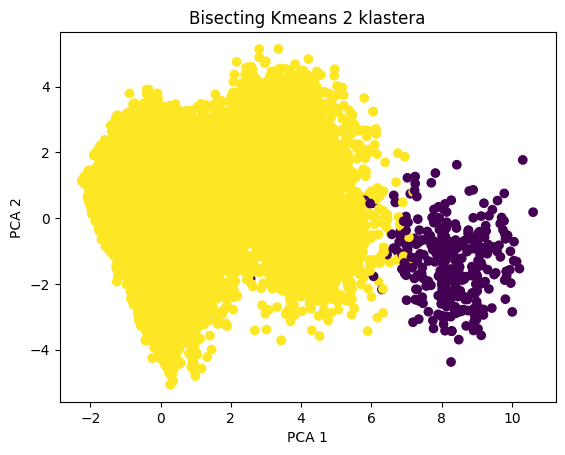

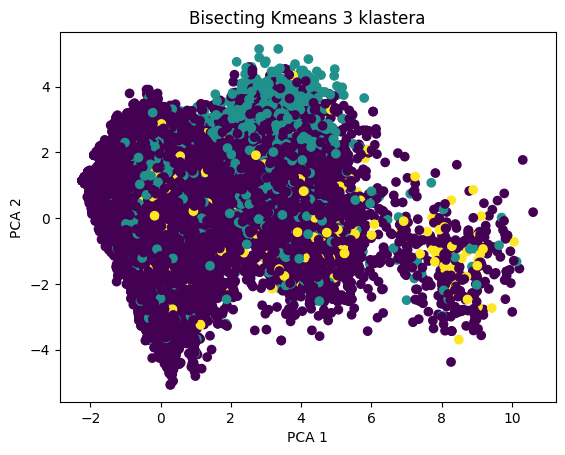

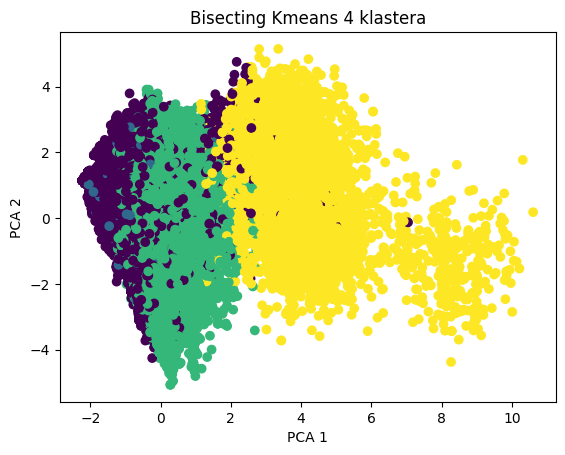

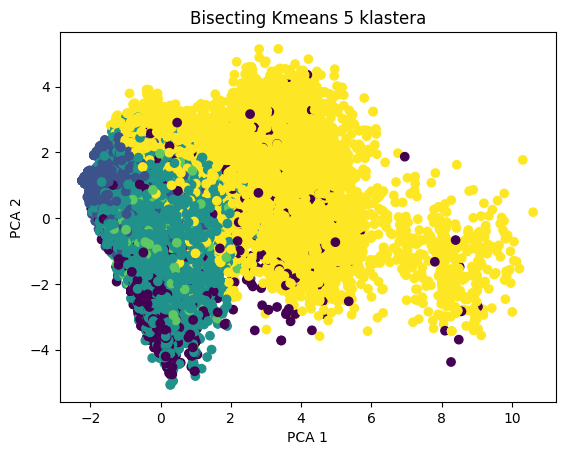

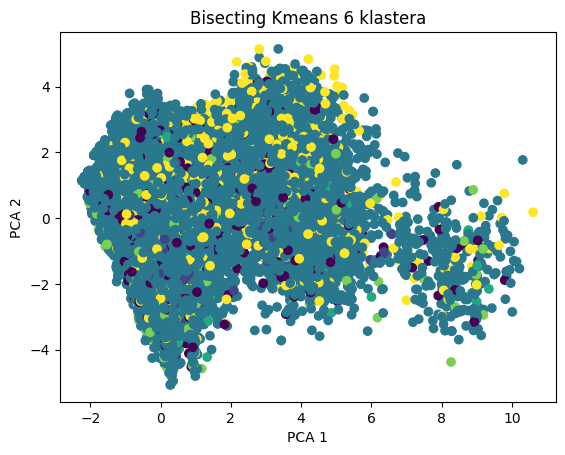

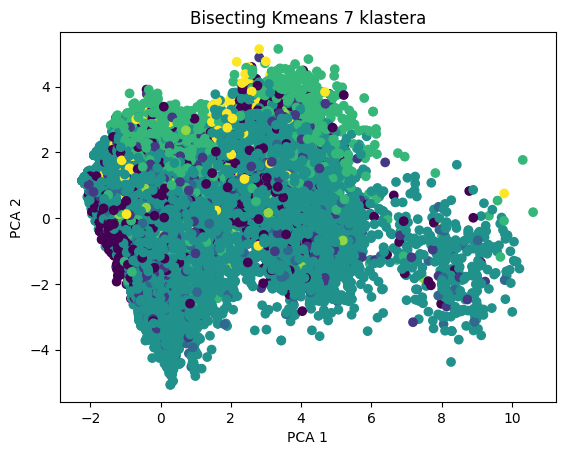

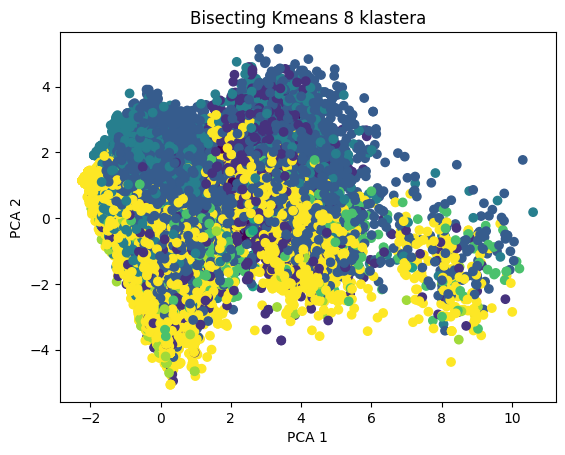

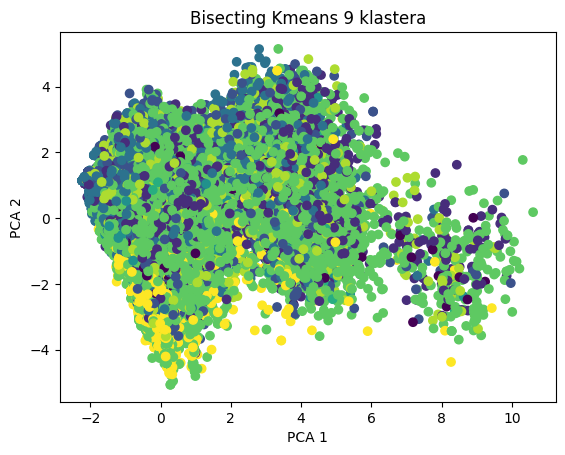

In [9]:
kmeans_cluster_centers = []
sse = []
silhouettes = []
for i in range (2, 10):
    bkmeans = BisectingKMeans(n_clusters=i,bisecting_strategy='largest_cluster')
    bkmeans.fit(X)
    visualize_clustering(bkmeans.cluster_centers_, bkmeans.labels_, [X_pca[:, 0], X_pca[:, 1]], "Bisecting Kmeans")
    kmeans_cluster_centers.append(bkmeans.cluster_centers_)
    sse.append(bkmeans.inertia_)
    silhouettes.append(silhouette_score(X, bkmeans.labels_))

In [10]:
sse

[9796918.694944134,
 9745291.442734402,
 9634164.60236582,
 9537680.543081641,
 9558048.281795694,
 9458947.376090597,
 9479524.734596461,
 9409815.284574227]

In [11]:
silhouettes

[0.419985917123806,
 0.03009745730245205,
 -0.009283971768218078,
 -0.029325800728311525,
 0.028410346033457577,
 0.006527554725017235,
 -0.004195737880432509,
 -0.0022609581562895156]

Pogledajmo kako se ponašaju SSE i silueta koeficijent. 

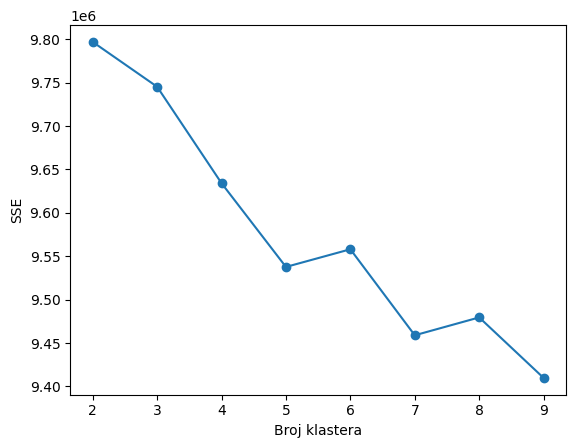

In [12]:
plt.plot([i for i in range(2,10)], sse,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("SSE")

plt.show()

Ocekivano da SSE opada sa porastom broja klastera

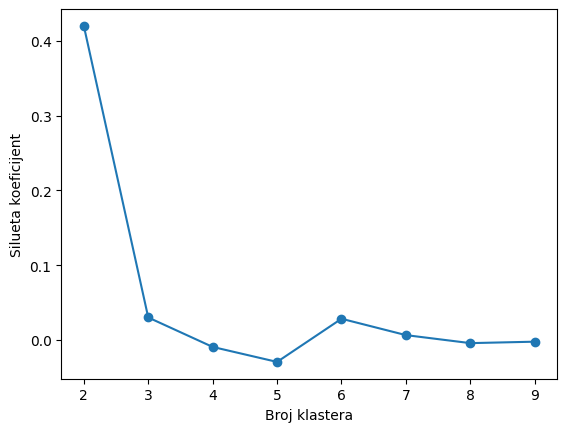

In [13]:
plt.plot([i for i in range(2,10)],silhouettes,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Silueta koeficijent")
plt.show()

Koristeci pravilo lakta mozemo da zakljucimo da je optimalan broj klastera 7

# K Means

Metoda zasnovana na reprezentativnim predstavnicima. Vrši podelu podataka na disjunktne klastere.

K-means predstavlja iterativni algoritam koji deli podatke u K klastera (broj klastera unapred definisan). Svaka tačka pripada tačno jednom klasteru.

Dodeljuje instance klasterima na način da suma kvadrata rastojanja između tačaka iz klastera i centroide bude što manja.

In [14]:
from sklearn.cluster import KMeans

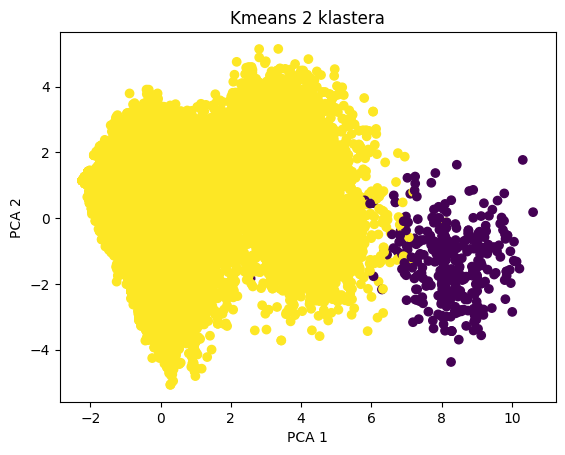

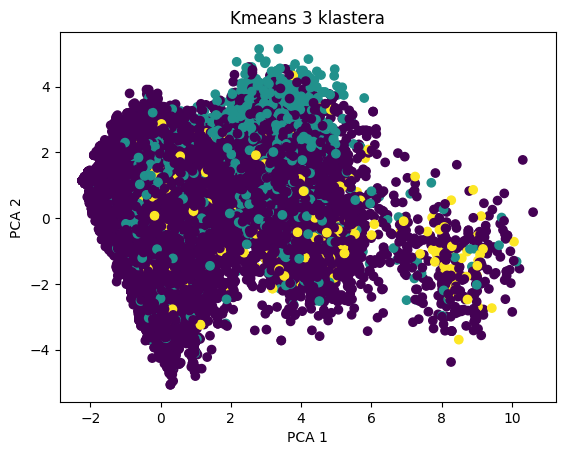

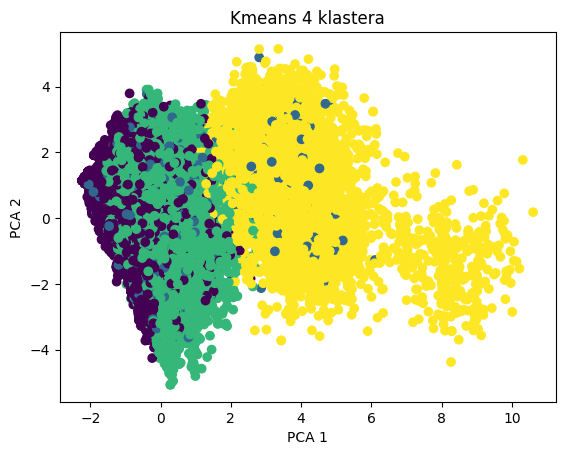

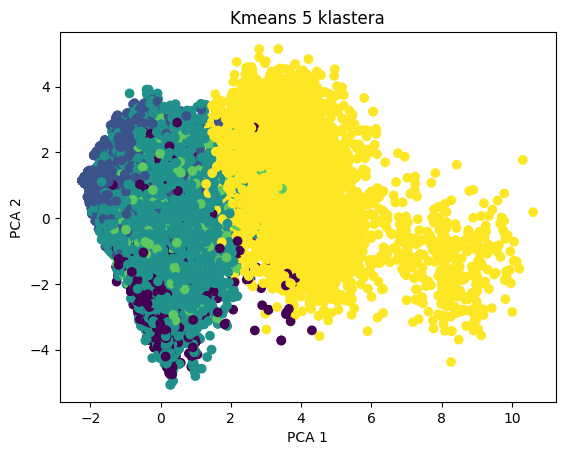

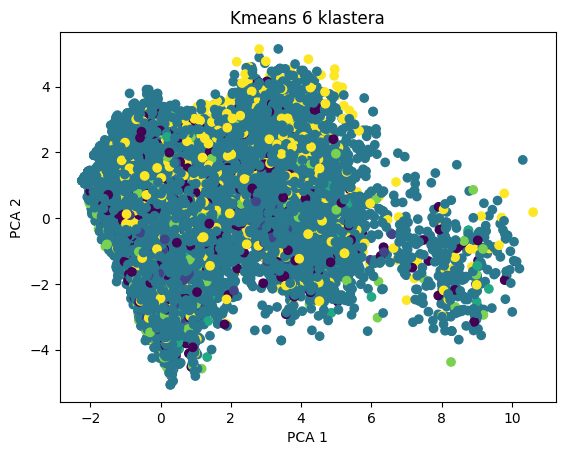

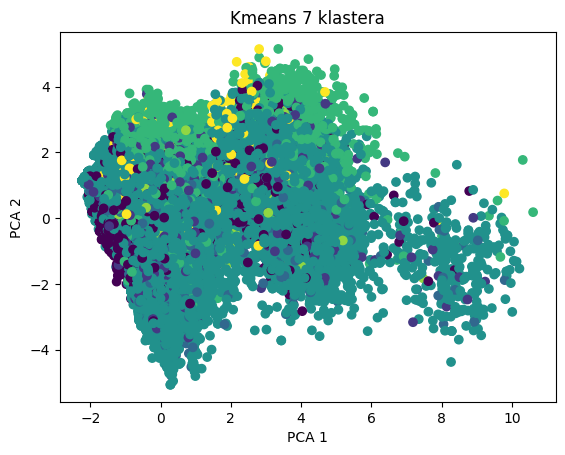

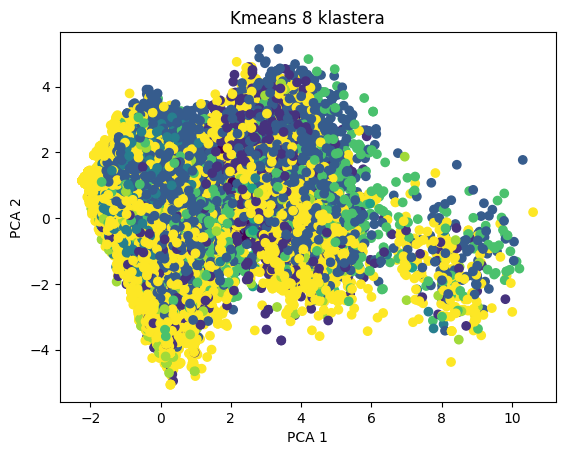

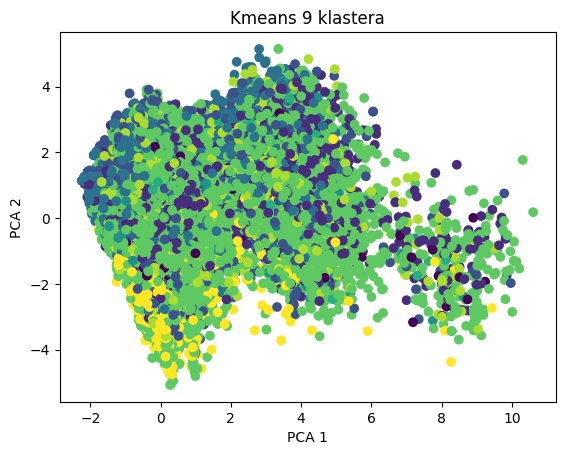

In [15]:
sse2 = []
silhouettes2 = []

for i in range (2, 10):
    kmeans = KMeans(n_clusters=i, init=kmeans_cluster_centers[i - 2], n_init=1)
    kmeans.fit(X)
    visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X_pca[:, 0], X_pca[:, 1]], "Kmeans")
    kmeans_cluster_centers.append(kmeans.cluster_centers_)
    sse2.append(kmeans.inertia_)
    silhouettes2.append(silhouette_score(X, kmeans.labels_))

In [16]:
sse2

[9796918.694944134,
 9745289.80347606,
 9591633.224092143,
 9509527.313770376,
 9538316.434863646,
 9448554.283589827,
 9383614.464278918,
 9334804.06456555]

In [17]:
silhouettes2

[0.419985917123806,
 0.030153364435813713,
 0.004694647021126949,
 -0.030988582711129253,
 0.027864726054443553,
 0.003260916498405158,
 -0.03520116524985501,
 -0.0005108978147693117]

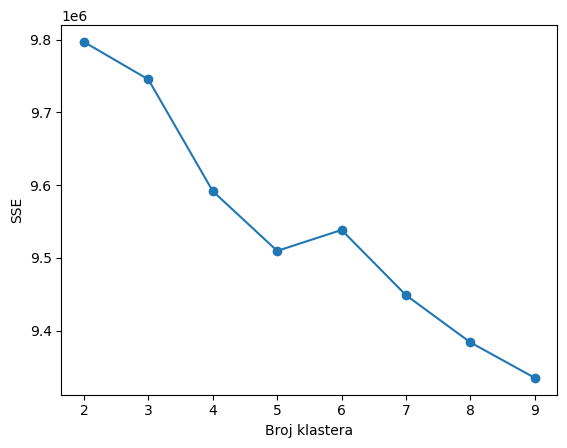

In [18]:
plt.plot([i for i in range(2,10)], sse2,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("SSE")
plt.show()

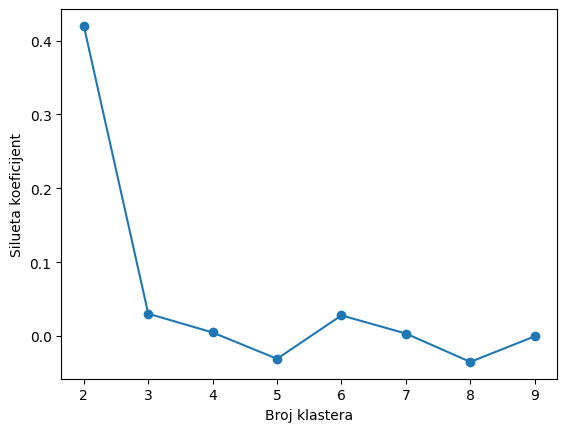

In [19]:
plt.plot([i for i in range(2,10)],silhouettes2,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Silueta koeficijent")
plt.show()

Koristeci pravilo lakta mozemo da zakljucimo da je optimalan broj klastera 7

# Fuzzy C-Means

K means i Bisecting K Means algoritmi pripadaju hard clustering algoritmima, gde jedna tačka pripada najviše jednom klasteru.

Fuzzy C Means algoritam je predstavnik soft clustering algoritama koji dozvoljavaju da tačke pripadaju istovremeno većem broju klastera sa različitim stepenom pripadnosti.
C-means u nazivu označava C centroida (identično kao kod K-means).

In [20]:
from fcmeans import FCM

In [21]:
fcm = FCM(n_clusters=5, m=3)
fcm.fit(X.to_numpy())

In [22]:
centers = fcm.centers

In [23]:
labels = fcm.predict(X.to_numpy())

In [24]:
features = [X_pca[:, 0], X_pca[:, 1]]

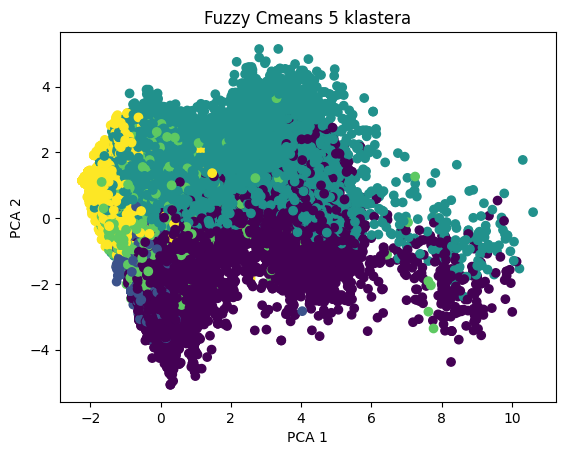

In [25]:
visualize_clustering(centers, labels, features, "Fuzzy Cmeans")
plt.show()

Da bismo dobili informacije o stepenu pripadnosti različitim klasterima, koristićemo soft_predict.

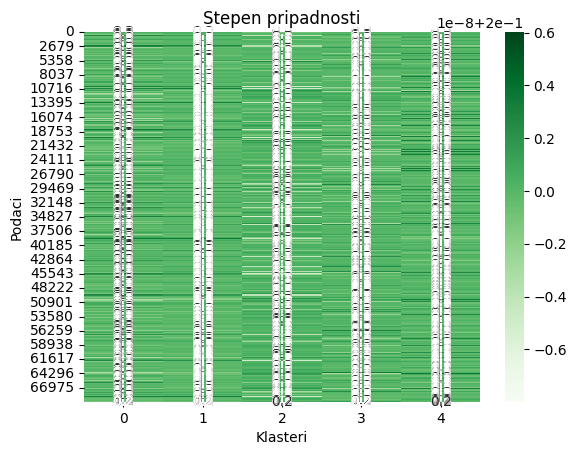

In [26]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title("Stepen pripadnosti")
plt.xlabel('Klasteri')
plt.ylabel('Podaci')
plt.show()